<a href="https://colab.research.google.com/github/ijustwanttoputcodehere/Praca_Inz/blob/main/Szkocka_AnalizaIWykresy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from platform import python_version

print(python_version())

3.7.10


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WhiskyDB/scotch_review.csv')

In [ ]:
df


,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
...,...,...,...,...,...,...,...
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."


In [ ]:
import re

int_price=[]

# finding out the complications in the column
for i in df['price']:
    #removing $ and , so that we can convert this feature price into integer type
    _=re.sub(r'[$,]+','',i)
    #converting float integrs
    x=re.sub(r'\W\d\d','',_)
    z=0
    #converting liter into one botle price
    if ("/l" in x):
        l=re.sub(r'[/l]\w+','',x)
        
        z=int(l)
        z=z*.75
        int_price.append(z)
        
    # if any of the alphanumeric value like space like we encountered the case : ('$15,000 or $60,000/set')     
    elif(" " in  x):
        l= re.sub(r'[ ]\w+\W+\w+','',x)
        z=int(l)
        int_price.append(z)
            
    elif ("set" in x):
        l=re.sub(r'[/]\w+','',x)
        
        z= int(l)
        z=z/4
        int_price.append(z)
    else :
        z=int(x)
        int_price.append(z)
print(int_price)     

[225, 4500, 13500, 325, 160, 85, 6250, 11000, 1500, 3360, 750, 1500, 3108, 105, 120, 3500, 70, 20000, 70, 15000, 26650, 400, 200, 400, 455, 750, 200, 460, 2525, 1250, 280, 500, 215, 300, 400, 2000, 4000, 225, 60, 180, 300, 3500, 120, 181, 20000, 800, 250, 500, 6000, 30000, 645, 11824, 1250, 550, 700, 140, 400, 700, 387, 5730, 100, 325, 300, 350, 350, 6088, 3500, 112, 109, 130, 100, 120, 1900, 100, 200, 1400, 84, 3000, 225, 164, 50, 150, 140, 175, 1100, 157000, 850, 34, 600, 225, 55, 60, 600, 400, 250, 15000.0, 90, 191, 1925, 2200, 1700, 430, 1100, 150, 300, 135, 250, 3000, 750, 60000, 95, 262, 750, 599, 9420, 600, 2000, 100, 350, 45, 85, 2850, 500, 1000, 150, 100, 1900, 3657, 127, 167, 1200, 525, 280, 3500, 80, 304, 370, 455, 3300, 4000, 3500, 580, 200, 240, 300, 65, 4500, 4000, 170, 60, 300, 248, 2000, 76, 236, 173, 560, 380, 100, 200, 145, 260, 140, 290, 85, 85, 150, 115, 130, 75, 225, 275, 125, 200, 815, 53, 99, 120, 200, 80, 125, 250, 100, 95, 155, 263, 95, 1600, 1722, 1500, 120, 1

In [ ]:
df['price']=int_price
df['price']=df['price'].astype(int)

In [ ]:
df.describe()

,Unnamed: 0,review.point,price
count,2247.000000,2247.000000,2247.000000
mean,1124.000000,86.700045,563.005785
std,648.797349,4.054055,4025.012426
min,1.000000,63.000000,12.000000
25%,562.500000,84.000000,70.000000
50%,1124.000000,87.000000,110.000000
75%,1685.500000,90.000000,200.000000
max,2247.000000,97.000000,157000.000000


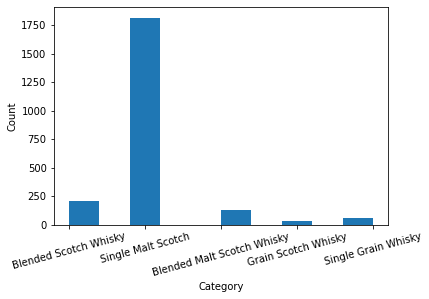

In [ ]:
from matplotlib.pyplot import figure
plt.hist(df['category'])

plt.xlabel('Category')
plt.ylabel('Count');
plt.xticks(rotation=15) 

plt.show()

In [ ]:
df['category'].value_counts()

Single Malt Scotch            1819
Blended Scotch Whisky          211
Blended Malt Scotch Whisky     132
Single Grain Whisky             57
Grain Scotch Whisky             28
Name: category, dtype: int64

In [ ]:
x = ["Single Malt Scotch", "Blended Scotch Whisky", "Blended Malt Scotch Whisky","Single Grain Whisky","Grain Scotch Whisky"]
y = [1819,211,132,57,28]

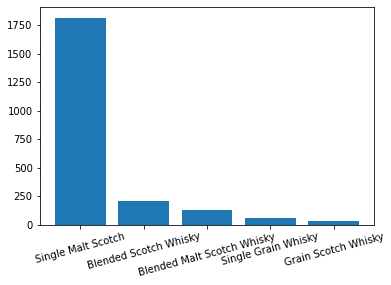

In [ ]:
plt.bar(x,y)

plt.xticks(rotation=15) 

plt.show()

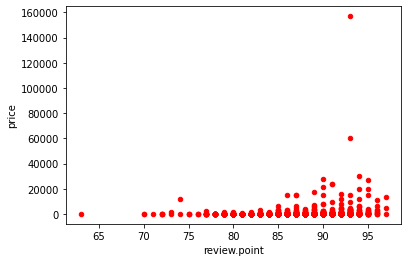

In [ ]:
df.plot(kind='scatter',x='review.point',y='price',color='red')

plt.show()

In [ ]:
new_df = df.loc[df['price'] < 1000]

print(new_df)

      Unnamed: 0  ...                                        description
0              1  ...  Magnificently powerful and intense. Caramels, ...
3              4  ...  With a name inspired by a 1926 Buster Keaton m...
4              5  ...  Captivating, enticing, and wonderfully charmin...
5              6  ...  Powerful, muscular, well-textured, and invigor...
10            11  ...  It’s great that Glenlivet releases whiskies un...
...          ...  ...                                                ...
2242        2243  ...  Its best attributes are vanilla, toasted cocon...
2243        2244  ...  Aged in a sherry cask, which adds sweet notes ...
2244        2245  ...  Earthy, fleshy notes with brooding grape notes...
2245        2246  ...  The sherry is very dominant and cloying, which...
2246        2247  ...  Fiery peat kiln smoke, tar, and ripe barley on...

[2101 rows x 7 columns]


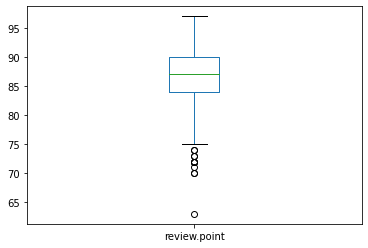

In [ ]:
dftt = df.sort_values('price',ascending=False)
dftt['review.point'].plot(kind="box")

In [ ]:
dftt = new_df.sort_values('price',ascending=False)
dftt['price'].plot(kind="box")

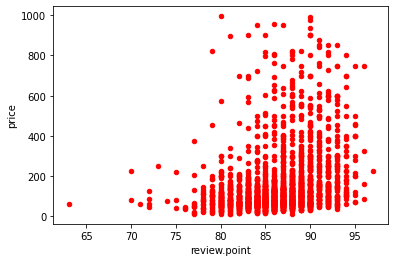

In [ ]:
new_df.plot(kind='scatter',x='review.point',y='price',color='red')

plt.show()